In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./sample_data/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
df.tail()

,Unnamed: 0,text,label
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


In [4]:
df.shape

(416809, 3)

In [5]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

(array([121187.,      0., 141067.,      0.,  34554.,      0.,  57317.,
             0.,  47712.,  14972.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

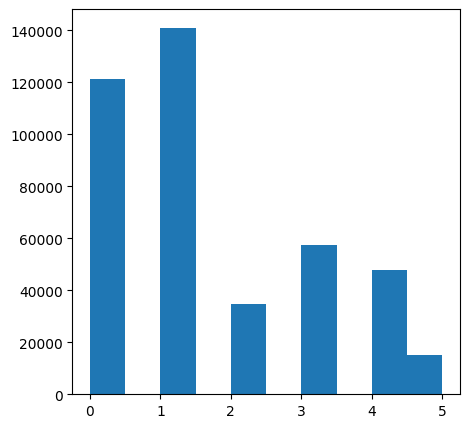

In [6]:
plt.figure(figsize=(5,5))
plt.hist(df["label"], align='mid')

In [7]:
### Data Preprocessing and EDA

In [8]:
### Exploratory Data Analysis

In [9]:
emotions = ['sadness', 'joy','love','anger','fear','surprise']

emotions_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

for emotion in df.label:
    if emotion in emotions_counts:
        emotions_counts[emotion] += 1

print('Emotions Count:', emotions_counts)

Emotions Count: {0: 121187, 1: 141067, 2: 34554, 3: 57317, 4: 47712, 5: 14972}


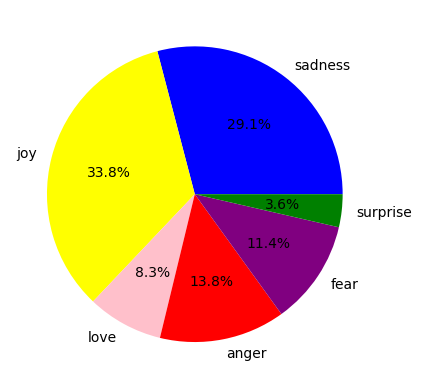

In [10]:
# Pie Chart
plt.pie(list(emotions_counts.values()), 
        labels=emotions, 
        autopct='%1.1f%%', 
        colors=['blue','yellow','pink','red','purple','green'])
plt.show()

In [11]:
### Random Forest Model Execution

In [12]:
from nltk.tokenize import word_tokenize
import nltk

In [13]:
# nltk.download('stopwords')

In [14]:
from nltk.corpus import stopwords

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [17]:
# nltk.download('punkt')

In [18]:
df["text"] = df["text"].apply(remove_stopwords)

In [19]:
df.head()

,Unnamed: 0,text,label
0,0,feel really helpless heavy hearted,4
1,1,ive enjoyed able slouch relax unwind frankly n...,0
2,2,gave internship dmrg feeling distraught,4
3,3,dont know feel lost,0
4,4,kindergarten teacher thoroughly weary job take...,4


In [20]:
df

,Unnamed: 0,text,label
0,0,feel really helpless heavy hearted,4
1,1,ive enjoyed able slouch relax unwind frankly n...,0
2,2,gave internship dmrg feeling distraught,4
3,3,dont know feel lost,0
4,4,kindergarten teacher thoroughly weary job take...,4
...,...,...,...
416804,416804,feel like telling horny devils find site suite...,2
416805,416805,began realize feeling agitated restless would ...,3
416806,416806,feel curious previous early dawn time seek tro...,5
416807,416807,feel becuase tyranical nature government el sa...,3


In [21]:
# remove the not_text elemts 

In [22]:
import re

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

df["text"]=df["text"].apply(remove_special_characters)

In [23]:
df["text"]=df["text"].apply(remove_special_characters)

In [24]:
df

,Unnamed: 0,text,label
0,0,feel really helpless heavy hearted,4
1,1,ive enjoyed able slouch relax unwind frankly n...,0
2,2,gave internship dmrg feeling distraught,4
3,3,dont know feel lost,0
4,4,kindergarten teacher thoroughly weary job take...,4
...,...,...,...
416804,416804,feel like telling horny devils find site suite...,2
416805,416805,began realize feeling agitated restless would ...,3
416806,416806,feel curious previous early dawn time seek tro...,5
416807,416807,feel becuase tyranical nature government el sa...,3


In [25]:
from nltk.stem import PorterStemmer

In [26]:
stemmer=PorterStemmer()

def word_stemmers(text):
    word=word_tokenize(text)
    stem_words = [stemmer.stem(words) for words in word]
    return " ".join(stem_words)

In [27]:
df["text"]=df["text"].apply(word_stemmers)

In [28]:
df

,Unnamed: 0,text,label
0,0,feel realli helpless heavi heart,4
1,1,ive enjoy abl slouch relax unwind frankli need...,0
2,2,gave internship dmrg feel distraught,4
3,3,dont know feel lost,0
4,4,kindergarten teacher thoroughli weari job take...,4
...,...,...,...
416804,416804,feel like tell horni devil find site suit sort...,2
416805,416805,began realiz feel agit restless would thought ...,3
416806,416806,feel curiou previou earli dawn time seek troubl,5
416807,416807,feel becuas tyran natur govern el salvador sav...,3


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
data=df["text"]
vector= TfidfVectorizer()

count_text = vector.fit_transform(data)

word_extraction = vector.get_feature_names_out()

In [32]:
word_extraction

array(['aa', 'aaa', 'aaaa', ..., 'zzzz', 'zzzzzz', 'zzzzzzz'],
      dtype=object)

In [33]:
count_text

<416809x51850 sparse matrix of type '<class 'numpy.float64'>'
	with 3741052 stored elements in Compressed Sparse Row format>

In [34]:
X = count_text # Features (text data)
y = df['label']  # Target variable (sentiment labels) 

In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(count_text, y, test_size=0.3, random_state=40)
# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (291766, 51850)
X_test shape: (125043, 51850)
y_train shape: (291766,)
y_test shape: (125043,)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(X_train, y_train)

In [ ]:
bow_random_predict = randomforest_classifier.predict(X_test)

In [ ]:
bow_random_predict